<a href="https://colab.research.google.com/github/youngIcom/Machine_Learning_Project/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Yesaya_Situmorang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [80]:
#Type your code here
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import joblib
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [2]:
# Tampilkan 5 baris pertama dengan function head.
url = 'https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
df.head(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [3]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [4]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

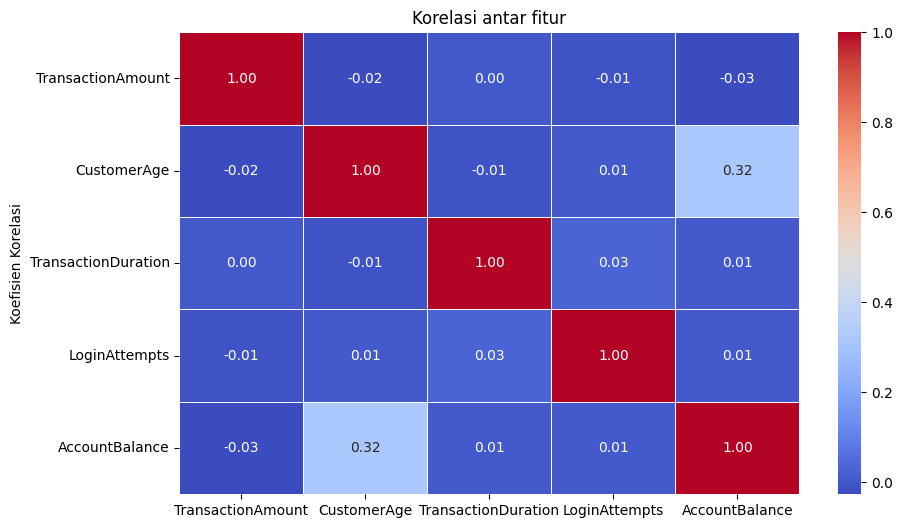

In [5]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)
plt.title('Korelasi antar fitur')
plt.ylabel('Koefisien Korelasi')
plt.show()

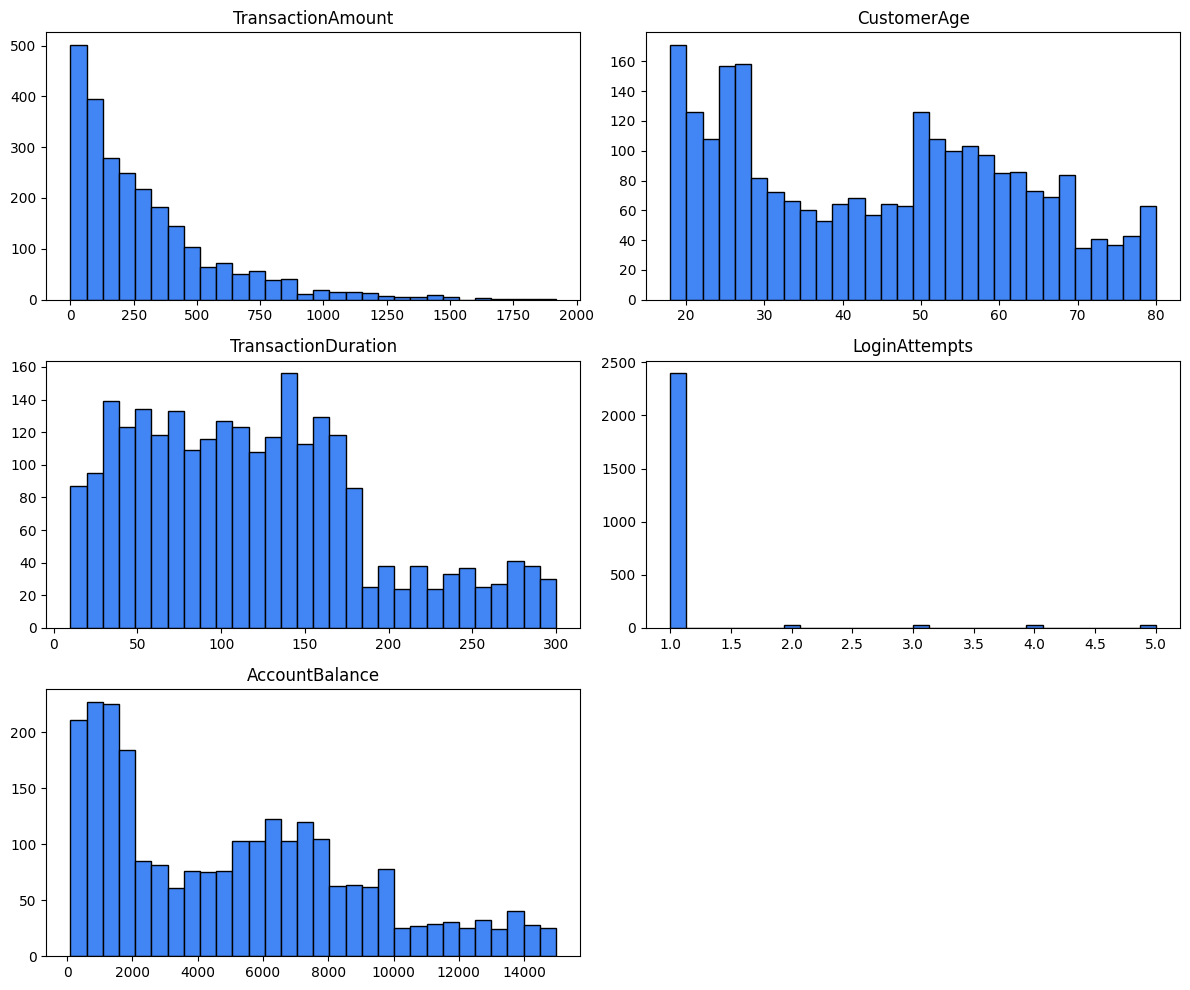

In [6]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.hist(bins=30, figsize=(12, 10), grid=False, color='#4285F4', edgecolor='black')
plt.title("Histogram")
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

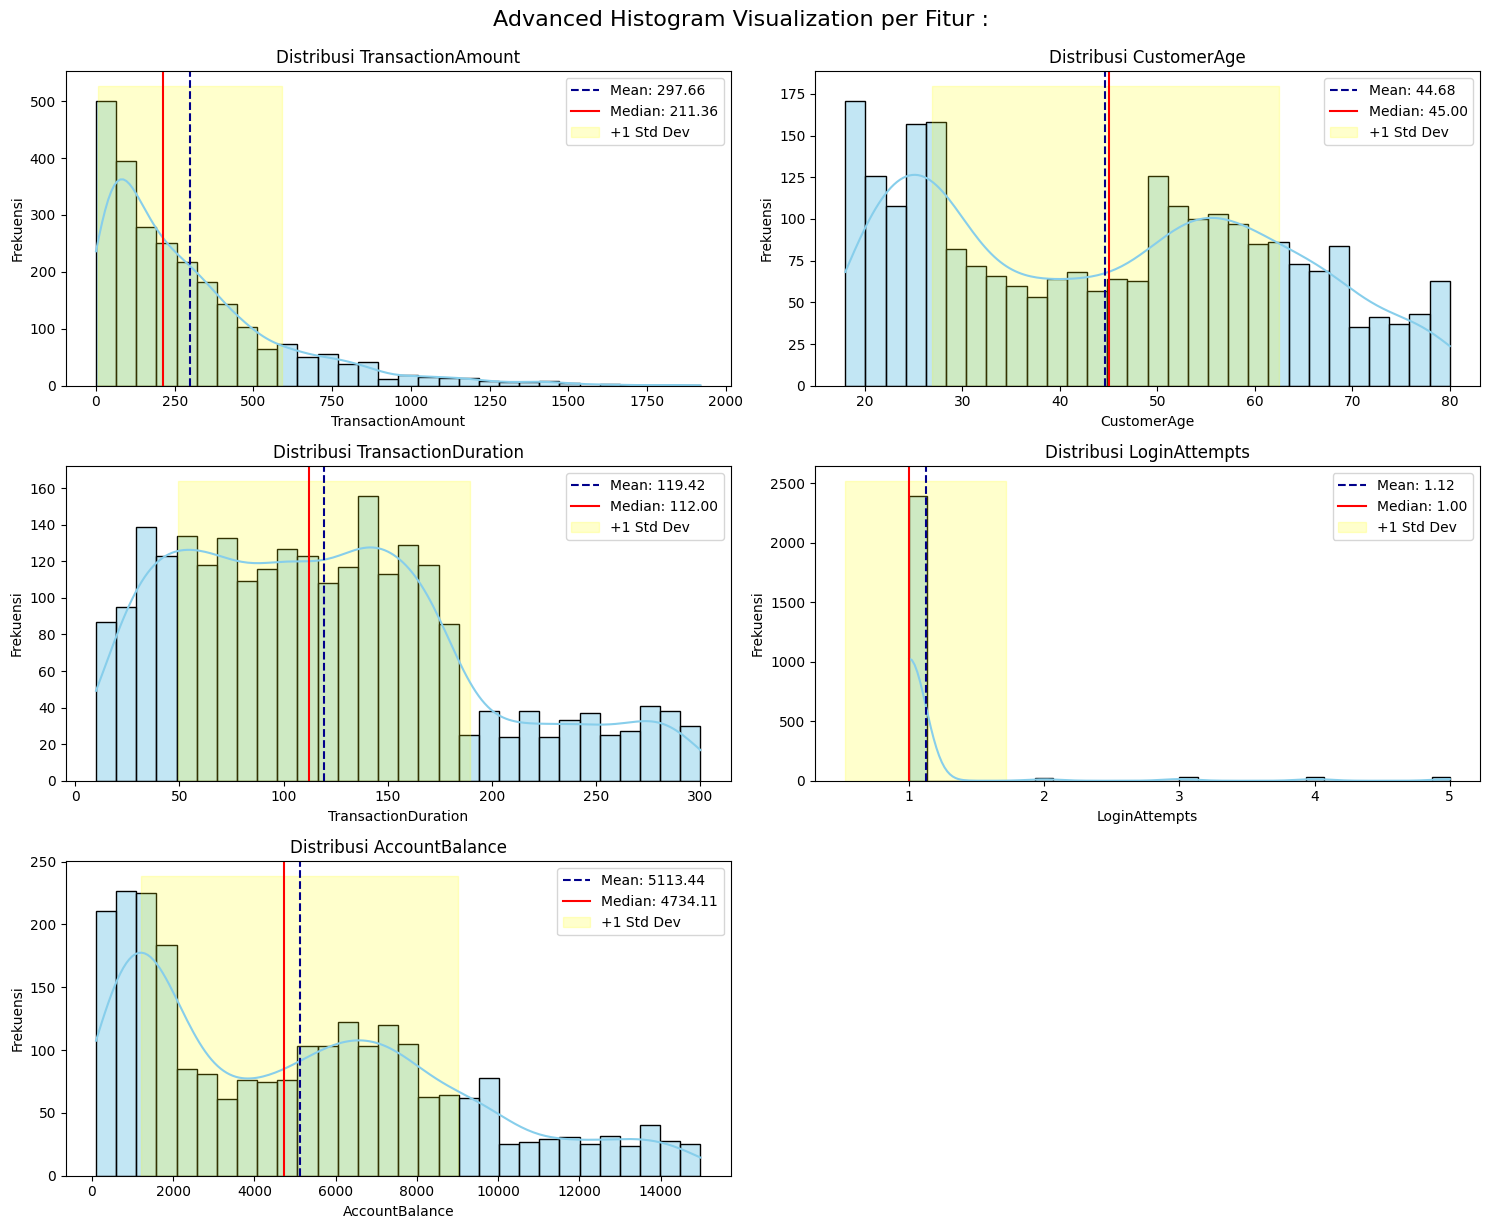

In [7]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
  plt.subplot(3, 2, i)
  sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue', edgecolor='black')
  #menambahkan garis vertikal untuk nilai mean dan median
  mean_val = df[col].mean()
  median_val = df[col].median()
  std_val = df[col].std()

  plt.axvline(mean_val, color='darkblue', linestyle='--', label=f'Mean: {mean_val:.2f}')
  plt.axvline(median_val, color='red', linestyle='-', label=f'Median: {median_val:.2f}')
  plt.fill_betweenx([0, plt.ylim()[1]], mean_val - std_val, mean_val + std_val, color='yellow', alpha=0.2, label='+1 Std Dev')

  plt.title(f"Distribusi {col}", fontsize=12)
  plt.xlabel(col)
  plt.ylabel('Frekuensi')
  plt.legend()

plt.tight_layout()
plt.suptitle("Advanced Histogram Visualization per Fitur : ", fontsize=16, y=1.02)
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [52]:
# Mengecek dataset menggunakan isnull().sum()
missing_value = df.isnull().sum()
print("   Kolom           |    Missing Value\n")
print(missing_value)

   Kolom           |    Missing Value

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [53]:
# Mengecek dataset menggunakan duplicated().sum()
duplicated_value = df.duplicated().sum()
print("jumlah data duplikasi : ", duplicated_value)

jumlah data duplikasi :  21


In [55]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
df_scaled = df.copy()
imputer  = SimpleImputer(strategy='mean')
existing_numerical_cols = [col for col in numerical_cols if col in df_scaled.columns]
if not existing_numerical_cols:
  print('Tidak ada kolom numerik yang ditemukan di dalam daftar yang diberikan')
else:
  df_scaled[existing_numerical_cols] = imputer.fit_transform(df_scaled[existing_numerical_cols])
  print('Dataframe setelah melakukan standard scaler : \n')
  print(df_scaled.head())

Dataframe setelah melakukan standard scaler : 

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0    70

In [33]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
column_drop = [col for col in df.columns if 'id' in col.lower() or 'ip address' in col.lower()]
df_cleaned = df.drop(columns=column_drop)
print(df_cleaned.head())

   TransactionAmount      TransactionDate TransactionType   Location Channel  \
0              14.09  2023-04-11 16:29:14           Debit  San Diego     ATM   
1             376.24  2023-06-27 16:44:19           Debit    Houston     ATM   
2             126.29  2023-07-10 18:16:08           Debit       Mesa  Online   
3             184.50  2023-05-05 16:32:11           Debit    Raleigh  Online   
4              13.45  2023-10-16 17:51:24          Credit    Atlanta  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0             Doctor                 81.0            1.0   
1         68.0             Doctor                141.0            1.0   
2         19.0            Student                 56.0            1.0   
3         26.0            Student                 25.0            1.0   
4          NaN            Student                198.0            1.0   

   AccountBalance PreviousTransactionDate  
0         5112.21     2024-11-04 08:

In [35]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
df_encode = df_cleaned.copy()
categorical_cols = df_encode.select_dtypes(include=['object', 'category']).columns

label_encoder = LabelEncoder()
for col in categorical_cols:
  df_encode[col] = label_encoder.fit_transform(df_encode[col].astype(str))

df_encode.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,14.09,680,1,36,0,70.0,0,81.0,1.0,5112.21,105
1,376.24,1178,1,15,0,68.0,0,141.0,1.0,13758.91,192
2,126.29,1262,1,23,2,19.0,3,56.0,1.0,1122.35,41
3,184.50,818,1,33,2,26.0,3,25.0,1.0,8569.06,163
4,13.45,1939,0,1,2,NaN,3,198.0,1.0,7429.40,16


In [38]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()
df_encode.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [39]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df_encode_clean = df_encode.dropna()

df_encode_clean.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,14.09,680,1,36,0,70.0,0,81.0,1.0,5112.21,105
1,376.24,1178,1,15,0,68.0,0,141.0,1.0,13758.91,192
2,126.29,1262,1,23,2,19.0,3,56.0,1.0,1122.35,41
3,184.50,818,1,33,2,26.0,3,25.0,1.0,8569.06,163
5,92.15,635,1,28,0,18.0,3,172.0,1.0,781.68,13


In [46]:
# Menghapus data duplikat menggunakan drop_duplicates().
df_encode_unique = df_encode.drop_duplicates()
print(df_encode_unique.head())

   TransactionAmount  TransactionDate  TransactionType  Location  Channel  \
0              14.09              680                1        36        0   
1             376.24             1178                1        15        0   
2             126.29             1262                1        23        2   
3             184.50              818                1        33        2   
4              13.45             1939                0         1        2   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0                   0                 81.0            1.0   
1         68.0                   0                141.0            1.0   
2         19.0                   3                 56.0            1.0   
3         26.0                   3                 25.0            1.0   
4          NaN                   3                198.0            1.0   

   AccountBalance  PreviousTransactionDate  
0         5112.21                      105  
1 

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [47]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
df_outlier_handler = df_encode_unique.copy()

numeric_cols = df_outlier_handler.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
  q1 = df_outlier_handler[col].quantile(0.25)
  q3 = df_outlier_handler[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  df_outlier_handler = df_outlier_handler[(df_outlier_handler[col] >= lower_bound) & (df_outlier_handler[col] <= upper_bound)]

df_outlier_handler.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,14.09,680,1,36,0,70.0,0,81.0,1.0,5112.21,105
1,376.24,1178,1,15,0,68.0,0,141.0,1.0,13758.91,192
2,126.29,1262,1,23,2,19.0,3,56.0,1.0,1122.35,41
3,184.50,818,1,33,2,26.0,3,25.0,1.0,8569.06,163
5,92.15,635,1,28,0,18.0,3,172.0,1.0,781.68,13


In [60]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
age_for_binning = df_outlier_handler['CustomerAge'].copy()
age_for_binning.fillna(age_for_binning.median(), inplace=True)
age_bins = [0, 25, 45, 65, np.inf]
age_labels = ['Remaja (0-25)', 'Dewasa Muda (26 - 45)', 'Dewasa (46 - 65)', 'lansia (65+)']
df_outlier_handler['Age_bin'] = pd.cut(age_for_binning,
                                 bins=age_bins,
                                 labels=age_labels,
                                 right=True,
                                 include_lowest=True)
le_age = LabelEncoder()
df_outlier_handler['Age_Bin_Encoded'] = le_age.fit_transform(df_outlier_handler['Age_bin'])
print(" Hasil Binning Encoded Custom Age")
print(df_outlier_handler[['CustomerAge', 'Age_bin', 'Age_Bin_Encoded']].head())
print("\nPemetaan Kategoori Age_Bin :")
for i, label in enumerate(le_age.classes_):
  print(f"`{label} : {i}")
print("-"*10)

# Binning for TransactionAmount
amount_for_binning = df_outlier_handler['TransactionAmount'].copy()
amount_for_binning.fillna(amount_for_binning.median(), inplace=True)
amount_bins = amount_for_binning.quantile([0, 0.25, 0.5, 0.75, 1]).tolist()
amount_labels = ['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']
df_outlier_handler['TransactionAmount_bin'] = pd.cut(amount_for_binning,
                                               bins=amount_bins,
                                               labels=amount_labels,
                                               right=True,
                                               include_lowest=True)
le_amount = LabelEncoder()
df_outlier_handler['TransactionAmount_Bin_Encoded'] = le_amount.fit_transform(df_outlier_handler['TransactionAmount_bin'].astype(str))
print("\n Hasil Binning Encoded Transaction Amount")
print(df_outlier_handler[['TransactionAmount', 'TransactionAmount_bin', 'TransactionAmount_Bin_Encoded']].head())
print("\nPemetaan Kategori Transaction Amount Bin:")
for i, label in enumerate(le_amount.classes_):
    print(f"`{label}`:{i}")
print("-" * 10)

 Hasil Binning Encoded Custom Age
   CustomerAge                Age_bin  Age_Bin_Encoded
0         70.0           lansia (65+)                3
1         68.0           lansia (65+)                3
2         19.0          Remaja (0-25)                2
3         26.0  Dewasa Muda (26 - 45)                1
5         18.0          Remaja (0-25)                2

Pemetaan Kategoori Age_Bin :
`Dewasa (46 - 65) : 0
`Dewasa Muda (26 - 45) : 1
`Remaja (0-25) : 2
`lansia (65+) : 3
----------

 Hasil Binning Encoded Transaction Amount
   TransactionAmount TransactionAmount_bin  TransactionAmount_Bin_Encoded
0              14.09                Rendah                              0
1             376.24         Sangat Tinggi                              1
2             126.29                Sedang                              2
3             184.50                Sedang                              2
5              92.15                Sedang                              2

Pemetaan Kategori Tra

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [62]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df_outlier_handler.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Age_Bin_Encoded,TransactionAmount_Bin_Encoded
count,1662.000000,1662.000000,1662.0,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1662.0,1662.000000,1662.000000,1662.000000,1662.000000
mean,252.115975,1242.495187,1.0,21.375451,0.925993,44.334537,1.531889,119.035499,1.0,5070.195806,182.354994,1.141998,1.498797
std,214.119961,729.956974,0.0,12.405785,0.842110,17.759413,1.154999,70.776296,0.0,3846.200085,103.488718,1.042876,1.118370
min,0.260000,0.000000,1.0,0.000000,0.000000,18.000000,0.000000,10.000000,1.0,101.250000,0.000000,0.000000,0.000000
25%,77.462500,614.250000,1.0,11.000000,0.000000,27.000000,0.000000,61.000000,1.0,1465.105000,95.000000,0.000000,0.250000
50%,193.680000,1235.500000,1.0,21.000000,1.000000,44.000000,2.000000,111.500000,1.0,4714.360000,183.000000,1.000000,1.000000
75%,371.240000,1873.750000,1.0,32.000000,2.000000,59.000000,3.000000,163.000000,1.0,7619.557500,271.000000,2.000000,2.000000
max,903.190000,2485.000000,1.0,43.000000,3.000000,80.000000,4.000000,300.000000,1.0,14977.990000,360.000000,3.000000,3.000000


Menjalankan Elbow Method Visualizer


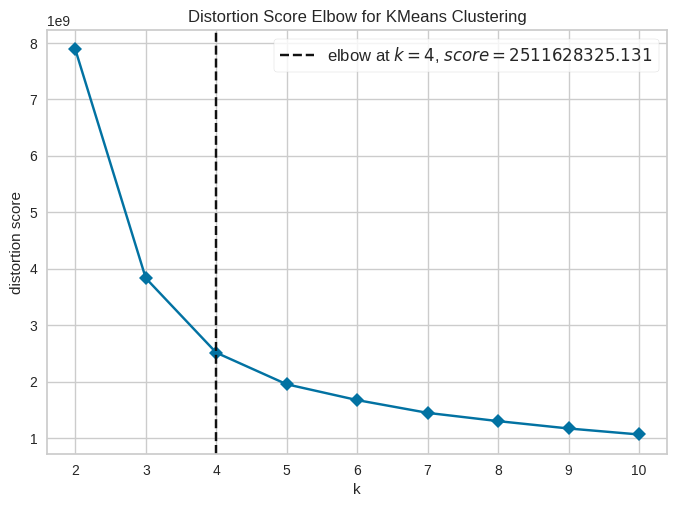

In [67]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
model_kmeans_for_elbow = KMeans(init='k-means++', random_state=42, n_init=10)

visualizer = KElbowVisualizer(
    model_kmeans_for_elbow,
    k=(2, 11),
    metric='distortion',
    timings=False
)

print("Menjalankan Elbow Method Visualizer")
X = df_outlier_handler.select_dtypes(include=np.number) # Select only numerical columns
visualizer.fit(X)
visualizer.show()
plt.show()

In [73]:
# Menggunakan algoritma K-Means Clustering
optimal_k_value = 4

model_kmeans_final = KMeans(n_clusters=optimal_k_value, n_init='auto', random_state=42)
model_kmeans_final.fit(X)
print("Pelatihan K-Means Selesai...")

cluster_labels = model_kmeans_final.labels_
df_outlier_handler['Target'] = cluster_labels
df_outlier_handler.head()

Pelatihan K-Means Selesai...


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Age_bin,Age_Bin_Encoded,TransactionAmount_bin,TransactionAmount_Bin_Encoded,Target
0,14.09,680,1,36,0,70.0,0,81.0,1.0,5112.21,105,lansia (65+),3,Rendah,0,2
1,376.24,1178,1,15,0,68.0,0,141.0,1.0,13758.91,192,lansia (65+),3,Sangat Tinggi,1,3
2,126.29,1262,1,23,2,19.0,3,56.0,1.0,1122.35,41,Remaja (0-25),2,Sedang,2,1
3,184.50,818,1,33,2,26.0,3,25.0,1.0,8569.06,163,Dewasa Muda (26 - 45),1,Sedang,2,0
5,92.15,635,1,28,0,18.0,3,172.0,1.0,781.68,13,Remaja (0-25),2,Sedang,2,1


Jalankan cell code ini untuk menyimpan model kamu.

In [76]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
nama_file_model = "model_clustering.h5"

joblib.dump(model_kmeans_final, nama_file_model)
print(f"Model K-Means telah berhasil disimpang sebagai {nama_file_model}")

Model K-Means telah berhasil disimpang sebagai model_clustering.h5


(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [79]:
# Menghitung dan menampilkan nilai Silhouette Score.
try:
  score_silhouette = silhouette_score(X, cluster_labels)
  print(f"Silhouette Score untuk model K-Means (k={optimal_k_value}) : {score_silhouette:.4f}")

except NameError as e:
  print(f"Error: Variable tidak ditemukan")
  print(f"Detil Error : {e}")

Silhouette Score untuk model K-Means (k=4) : 0.5093


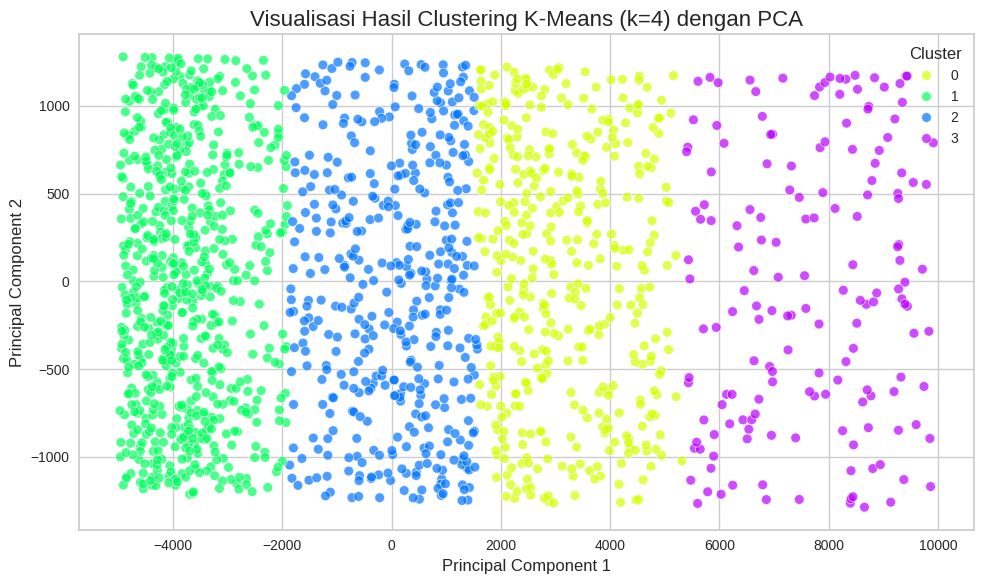

In [83]:
# Membuat visualisasi hasil clustering
x_for_visualization = X

pca = PCA(n_components=2, random_state=42)

principle_component = pca.fit_transform(x_for_visualization)

df_pca = pd.DataFrame(data=principle_component, columns=['PC 1', 'PC 2'])
df_pca['Cluster'] = cluster_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC 1',
                y='PC 2',
                hue='Cluster',
                palette=sns.color_palette("hsv", n_colors=optimal_k_value),
                data=df_pca,
                legend='full',
                alpha=0.7
)

plt.title(f"Visualisasi Hasil Clustering K-Means (k={optimal_k_value}) dengan PCA", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

PCA memilih 1 komponen untuk menjelaskan 95% variant
Dimensi data setelah PCA : (1662, 1)

Menjalankan Elbow Method Visualizer


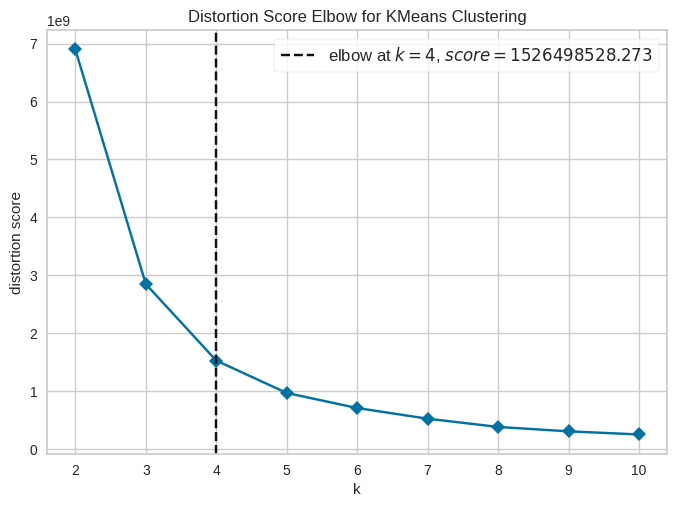

Nilai k yang disarankan untuk data PCA: 4


In [88]:
# Membangun model menggunakan PCA.
pca_modeling = PCA(n_components=0.95, random_state=42)

X_pca_modeling = pca_modeling.fit_transform(X)

n_components_selected = pca_modeling.n_components_
print(f"PCA memilih {n_components_selected} komponen untuk menjelaskan 95% variant")
print(f"Dimensi data setelah PCA : {X_pca_modeling.shape}")

#menentukan nilai cluster yang optimal untuk data PCA
model_kmeans_pca_elbow = KMeans(n_init='auto', random_state=42)

visualizer_pca = KElbowVisualizer(
    model_kmeans_pca_elbow,
    k=(2, 11),
    metric='distortion',
    timings=False
)

print("\nMenjalankan Elbow Method Visualizer")
# X = df_outlier_handler.select_dtypes(include=np.number) # Select only numerical columns
visualizer_pca.fit(X_pca_modeling)
# visualizer.fit(X)
visualizer_pca.show()
plt.show()

suggested_k_pca = visualizer_pca.elbow_value_
if suggested_k_pca:
    print(f"Nilai k yang disarankan untuk data PCA: {suggested_k_pca}")
else:
    print("KElbowVisualizer tidak dapat secara otomatis menentukan titik siku untuk data PCA. Silakan amati plot secara manual.")


In [89]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")

nama_file_model_pca = "PCA_model_clustering.h5"

joblib.dump(pca_modeling, nama_file_model_pca)
print(f"Model PCA telah berhasil disimpang sebagai {nama_file_model_pca}")

Model PCA telah berhasil disimpang sebagai PCA_model_clustering.h5


# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [90]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

numerical_features_for_interpretation = df_outlier_handler.select_dtypes(include=np.number).columns.to_list()

if 'Target' in numerical_features_for_interpretation:
  numerical_features_for_interpretation.remove('Target')

if numerical_features_for_interpretation:
  cluster_summary = df_outlier_handler.groupby('Target')[numerical_features_for_interpretation].agg(
      ['mean', 'min', 'max', 'median', 'std']
  )

  print("Analisis Deskriptif Fitur Numerik per Cluster : ")
  print(cluster_summary)
else :
  print("Tidak ada fitur numerik yang ditemukan dalam DataFrame.")

Analisis Deskriptif Fitur Numerik per Cluster : 
       TransactionAmount                                    TransactionDate  \
                    mean   min     max   median         std            mean   
Target                                                                        
0             259.068824  0.32  903.19  208.550  213.625275     1309.566176   
1             253.013685  0.26  880.04  193.160  214.748074     1215.713224   
2             243.409017  1.82  889.01  177.050  209.077004     1208.695444   
3             253.273780  1.14  896.79  173.465  226.353789     1271.481707   

                                      ... Age_Bin_Encoded                 \
       min   max  median         std  ...            mean min max median   
Target                                ...                                  
0        2  2485  1365.0  728.518358  ...        0.950980   0   3    1.0   
1        0  2485  1194.0  717.661710  ...        1.344725   0   3    1.0   
2        3  2485 

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (Nasabah dengan Usia Dewasa Muda dengan Transaksi Menengah dan aktivitas login normal)**:
  - **Rata-rata (mean) Transaction Amount:** 259.07<Sebelum inverse> <Setelah inverse>
  - **Rata-rata (mean) Age_Bin_Encoded:** 0.95 (merepresentasikan dominasi 'Dewasa Muda (25 - 45 tahun))
  - **Rata-rata (mean) LoginAttempts:** 1.12
  - **Analisis:** Cluster ini didominasi oleh nasabah dalam kelompok usia dewasa muda (rata-rata kode usianya adalah 0.95, mendekati kode untuk 26-45 tahun). Mereka menunjukkan nilai transaksi rata-rata yang cukup baik dengan variasi pengeluaran yang terlihat dari standard deviasi. Aktivitas login mereka juga normal dan stabil. Kelompok ini potensial untuk penawaran produk yang relevan dengan gaya hidup dewasa muda, atau promosi cashback.

2. **Cluster 2 : (Nasabah Dewasa dengan transaksi dan aktivitas login yang konsisten)**:
  - **Rata-rata (mean) Transaction Amount:** 253.01
  - **Rata-rata (mean) Age_Bin_Encoded:** 1.34
  - **Rata-rata (mean) Login_Attempt:** 1.12
  - **Analisis:** Cluster ini terdiri dari nasabah yang sedikit lebih tua daripada cluster sebelumnya, bergerak pada dewasa muda ke dewasa (rata rata kode usianya adalah 1.34). Mereka terlihat memiliki nilai transaksi rata-rata sedang, dan menunjukkan konsistensi dalam penggunaan akun. Pendekatan pemasaran yang cocok untuk cluster ini adalah pada investasi jangka panjang menengah atau layanan yang mendukung stabilitas finansial.

3. **Cluster 3 : (Nasabah Dewasa Muda dengan Transaksi Cuku Merata & Aktivitas login normal)**:
  - **Rata-rata (mean) TransactionAmount:** 243.41
  - **Rata-rata (mean) Age_Bin_Encoded:** 1.14
  - **Rata-rata (mean) LoginAttempts:** 1.11
  - **Analisis:** Kelompok ini juga mayoritas adalah dewasa muda (rata-rata kode usia 1.14). Rata-rata nilai transaksi mereka (243.41) sedikit lebih rendah dibandingkan dua cluster sebelumnya, namun standar deviasi TransactionAmount (209.08) menunjukkan distribusi transaksi yang cukup merata. Mereka menunjukkan potensi untuk meningkatkan nilai transaksi jika diberikan stimulus yang sesuai, seperti promosi yang dipersonalisasi atau edukasi produk yang relevan.

4. **Cluster 4 : (Nasabah usia muda/remaja dengan variabilitas transaksi tinggi):**
  - **Rata-rata (mean) TransactionAmount:** 253.27
  - **Rata-rata (mean) Age_Bin_Encoded: ** 0.78
  - **Rata-rata (mean) LoginAttempts: **1.13
  - **Analisis: **Cluster ini cenderung diisi oleh nasabah yang lebih muda (rata-rata kode usia 0.78, mengarah ke remaja atau awal dewasa muda). Meskipun rata-rata transaksinya sebanding dengan Cluster 1 (253.27), standar deviasi TransactionAmount yang paling tinggi (226.35) menunjukkan variasi pengeluaran yang sangat besar, atau mungkin transaksi yang tidak teratur. Ini bisa mencakup nasabah baru atau mereka yang kurang aktif. Strategi re-engagement, penawaran untuk pemula, atau kampanye yang membangun kebiasaan transaksi rutin bisa efektif untuk kelompok ini.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [94]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
if 'Target' in df_outlier_handler.columns:
  print("Kolom Target sudah ada didalam dataframe")
  print("beberapa tampilan baris dari kolom 'Target' : \n")
  print(df_outlier_handler['Target'].head())
else:
  print("Kolom Target belum ada didalam dataframe")

Kolom Target sudah ada didalam dataframe
beberapa tampilan baris dari kolom 'Target' : 

0    2
1    3
2    1
3    0
5    1
Name: Target, dtype: int32


In [95]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
nama_file_output = 'data_clustering.csv'

try:
  df_outlier_handler.to_csv(nama_file_output, index=False)
  print(f"Dataframe telah berhasil disimpan sebagai {nama_file_output}")
except NameError:
  print(f"Terjadi Error : DataFrame 'df_outlier_handler' tidak ditemukan")
except Exception as e:
  print(f"Terjadi Error : {e}")

Dataframe telah berhasil disimpan sebagai data_clustering.csv


(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [29]:
# inverse dataset ke rentang normal untuk numerikal
# inverse dataset yang sudah diencode ke kategori aslinya.

In [30]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [31]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [32]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

In [ ]:
# Menggunakan algoritma K-Means Clustering
# Replace '4' with the optimal number of clusters from the Elbow Method
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_outlier_handler['Cluster'] = kmeans.fit_predict(X)

display(df_outlier_handler.head())